# Importing, Examining, and Manipulating Point Clouds

The most basic operations of LiDAR analysis involve importing and inspecting tiles of LiDAR data. This sample demonstrates basic file input, plotting, filtering and output using `pyfor`.

## Importing Point Clouds

In [1]:
import importlib.machinery
pyfor = importlib.machinery.SourceFileLoader('pyfor','/home/bryce/Programming/PyFor/pyfor/__init__.py').load_module()

The first step after importing in most workflows is to instantiate a Cloud object. This can be done by calling the cloud.Cloud class on a las or laz file path. The instance of the Cloud class holds all methods and data related to the raw point cloud, some of which we will explore below.

In [2]:
tile = pyfor.cloud.Cloud("data/test.las")

Once we have an instance of our Cloud object we can explore some information regarding the point cloud. The header information, for example, is stored in the .las.header attribute. We can access that information thusly:

In [4]:
print("Number of points: %d" % tile.las.header.count)

Number of points: 2912035


In [5]:
tile.las.header.max

[405999.98999999999, 3276999.9900000002, 945.36000000000001]

In [6]:
tile.las.header.min

[405000.0, 3276227.8599999999, -238.43000000000001]

The point cloud itself is organized in a `pandas` dataframe. Those familiar with the `pandas` package will be right at home here.

In [6]:
tile.las.points.head()

classification  flag_byte  intensity  pt_src_id  scan_angle_rank  \
0               2          9          5          9               13   
1               1          9          1          9               13   
2               2          9          1          9               13   
3               1          9          1          9               13   
4               2          9          1          9               12   

   user_data          x           y      z  
0          0  405961.34  3276236.02  24.57  
1          5  405962.14  3276236.03  25.05  
2          0  405967.66  3276235.89  24.76  
3          0  405968.37  3276235.88  24.76  
4          0  405979.79  3276235.63  24.77

We can use any `pandas` functionality from this data frame that we desire. If we want to examine the distribution of the `z` dimension, we can do so:

If we want a simple plot of the point cloud we can do so using the `.plot()` method. This has an optional argument to define the pixel size of the plot (in the same units as the input point cloud).

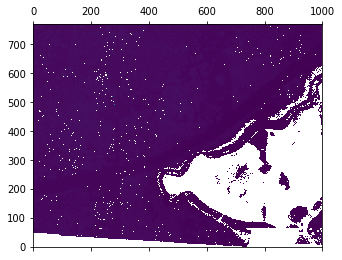

In [ ]:
tile.plot()

Looks like we have some outliers that need to be removed, this can be done using the `.filter_z()` method, explored in detail below.

## Filtering Points

In [5]:
tile.filter(min=0, max=100, dim = "z")
tile.iplot3d(point_size = 2)

Point cloud too large, down sampling for plot performance.


If we wish, we can re-plot at courser resolutions.

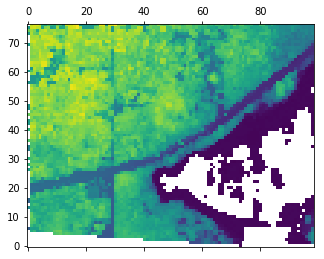

In [5]:
tile.plot(cell_size=10)